In [ ]:
# анализ выдачи кредитов в зависимости от пола и региона проживания

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_kiva_loans = pd.read_csv("loans.csv")
df_mpi = pd.read_csv("region_locations.csv")

In [21]:
country_region_sector_gender = df_kiva_loans[['country', 'sector','borrower_genders', 'lender_count']].merge(df_mpi_grouped, how = 'left', on = 'country')

In [4]:
df_mpi_grouped = df_mpi.groupby(['country', 'world_region'])['MPI'].mean().fillna(0).reset_index()
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how = 'left', on = 'country')

In [22]:
country_region_sector_gender.head(5)

,country,sector,borrower_genders,lender_count,world_region,MPI
0,Pakistan,Food,female,12,South Asia,0.233167
1,Pakistan,Transportation,"female, female",14,South Asia,0.233167
2,India,Transportation,female,6,South Asia,0.000000
3,Pakistan,Arts,female,8,South Asia,0.233167
4,Pakistan,Food,female,16,South Asia,0.233167


In [23]:
# рассмотрим мужчин в разделе параметров : страна, регион, сектор экономики
male1 = country_region_sector_gender[country_region_sector_gender['borrower_genders'] == 'male']

In [33]:
female1 = country_region_sector_gender[country_region_sector_gender['borrower_genders'] == 'female']

In [34]:
female1.head(4)

,country,sector,borrower_genders,lender_count,world_region,MPI
0,Pakistan,Food,female,12,South Asia,0.233167
2,India,Transportation,female,6,South Asia,0.000000
3,Pakistan,Arts,female,8,South Asia,0.233167
4,Pakistan,Food,female,16,South Asia,0.233167


In [7]:
# посчитаем количество заявок по странам

male1_country = male1.groupby(['country'])['lender_count'].agg(sum = 'sum').sort_values(by = 'sum', ascending = False)

In [8]:
# сделаем аналогичные действия для пола женщин
# female1 = country_region_sector_gender[country_region_sector_gender['borrower_genders'] == 'female']
female1_country = female1.groupby(['country'])['lender_count'].agg(sum = 'sum').sort_values(by = 'sum', ascending = False)

# сбросим значение индексов в обоих фреймах для женщин и мужчин

male1_country = male1_country.reset_index()
female1_country = female1_country.reset_index()

In [9]:
# соединим два дата фрейма для того, чтобы увидеть по таблице возможные совпадения или определенные тенденции. Для этого отберём
# 15 стран с наибольшим количеством кредитов 

country_male_female = pd.DataFrame({'male_country':male1_country['country'].head(15), 'sum_male':male1_country['sum'].head(15), 
              'female_country':female1_country['country'].head(15), 
             'female_sum':female1_country['sum'].head(15)})

In [10]:
country_male_female

,male_country,sum_male,female_country,female_sum
0,El Salvador,264060,Philippines,1281649
1,Palestine,207173,Kenya,576789
2,Uganda,189901,El Salvador,418882
3,Kenya,185767,Pakistan,322930
4,United States,171608,Tajikistan,305166
5,Peru,157014,United States,249257
6,Colombia,130486,Ecuador,234067
7,Tajikistan,102696,Colombia,221801
8,Armenia,99168,Armenia,221372
9,Philippines,95844,Kyrgyzstan,184366


In [15]:
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

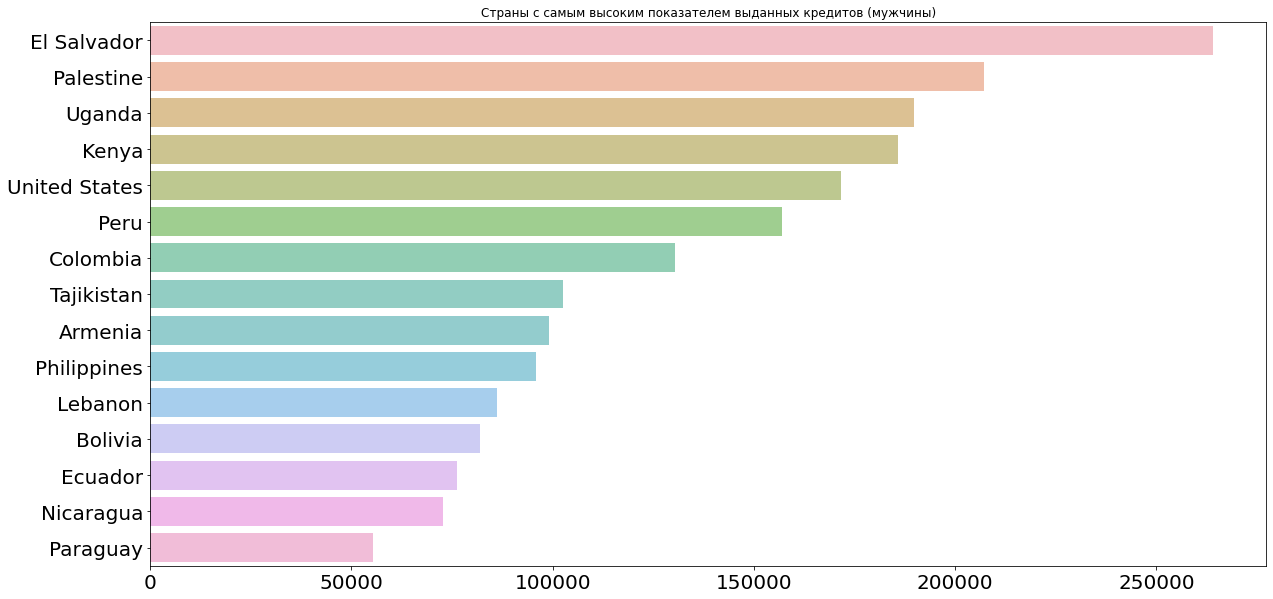

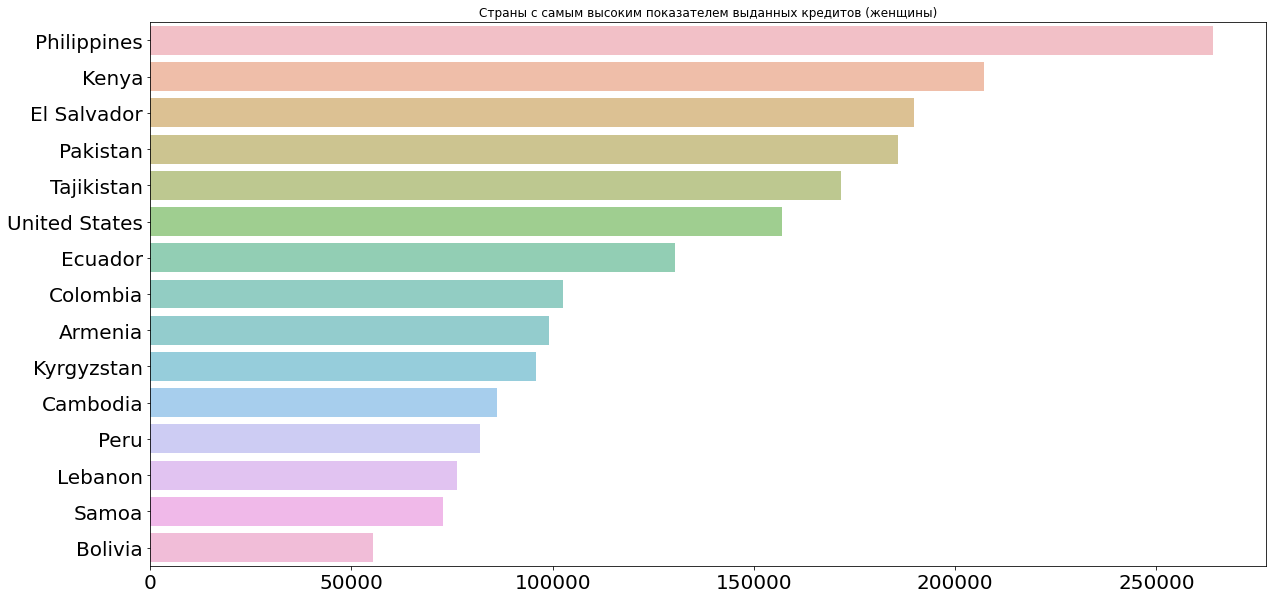

In [25]:
plt.figure(figsize = (20, 10))
sns.barplot(y = country_male_female['male_country'], x = country_male_female['sum_male'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Страны с самым высоким показателем выданных кредитов (мужчины)')

plt.show()
plt.figure(figsize = (20, 10))
sns.barplot(y = country_male_female['female_country'], x = country_male_female['sum_male'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Страны с самым высоким показателем выданных кредитов (женщины)')
plt.show()

In [17]:
# рассматривая данную таблицу мы можем сказать, что количество кредитов выданных женщинам отличается в большую сторону. 
# при том если мы возьмём лидера у мужчин по количеству кредитов El Salvador = 264 060, то у женщин El Salvador имеет 
# 418 882 кредитов. 
# В чём возможная причина такого различия? Одна из возможных причин ( не явная ) на примере El Salvador - это высокая 
# степень задействования мужского населения в участии в различных вооруженных конфликтах на данной территории. 
# Смертность среди мужчин является одной из самых высоких в мире. 
# Здесь возможен вариант того, что присутствует юридические запреты на выдачу кредита мужчинам занятым в сфере
# которая может быть опасна для жизни ( армия , силовые структуры). 
# Возможна и близкая причина, это более высокий риск для выдачи кредита мужчинам занятым с опасными видами деятельности 
# и как следствие кредит выдаётся с более высоким процентов (возможно учитывающим высокую стоимость страховки (страхование
# жизни)). Напомним, что в данном регионе уровень преступности ( и смертности) один из самых высоких в мире.
# К близким выводам мы можем прийти и по Кении, тк Кения является страной с достаточно высоким уровнем преступности. 
# Для семьи может быть более выгодным получать кредит для женщины, что и показывают цифры выданных кредитов между полами. 
# Данные цифры отличаются в три раза. 


# В списке мы видим высокое количество стран азиатского и африканского регионов. В основном это страны с далеко не самым
# высоким уровнем жизни. Основная причина такого высокого количества выданных кредитов заключается в том, 
# что в данных странах не совсем развита финансово-банковская система. В связи с этим за последнее время особое 
# развитие получили компании , которые специализируются на микрокредитовании и кредитовании через онлайн ( зачастую эти 
# составляющие являются вместе). 
# Дело в том, что всё микрофинансирование работает через мобильные приложения. Ввиду того, что большая часть населения данных
# стран занимается микро бизнесом (торговля перепродажа : еда на продажу, дешевая самодельная одежда), то микрофинансиро-
# вание является весьма востребованным. 
# Несмотря на высокий риск невозврата кредита, вероятнее всего конкуренты на данном рынке пошли на согласие для создания
# общей базы клиентов, которые не вернули кредит. Такому клиенту, вероятнее всего, будет отказано в любой 
# организации микрофинансирования. Следовательно, для жителей данных стран возврат кредита всё-таки важен. 
# Как уже было сказано выше, высокая доля в количестве женщин вероятнее всего связана с более высокой смертностью среди 
# мужчин или ещё с какими-то определенными ограничениями для мужчин (как вариант запрет для кредита тем, кто служит в войсках).




# Высокий процент микрокредитов среди женщин на Филлиппинах может быть связан с рядом причин. 
# У молодых девушек это возможно определенные наряды и косметика, тк многие девушки хотят выйти замуж за европейца.
# Также известно, что филиппинки позиционируются как хорошие жены и при этом очень красивые. Поэтому такие браки 
# являются далеко не редкостью. 
# У филиппинцев высокий процент населения имеющих кредиты и также высокая доля женщин может быть дополнительно связана
# с кредитными историями и условияем кредита для женщин. 


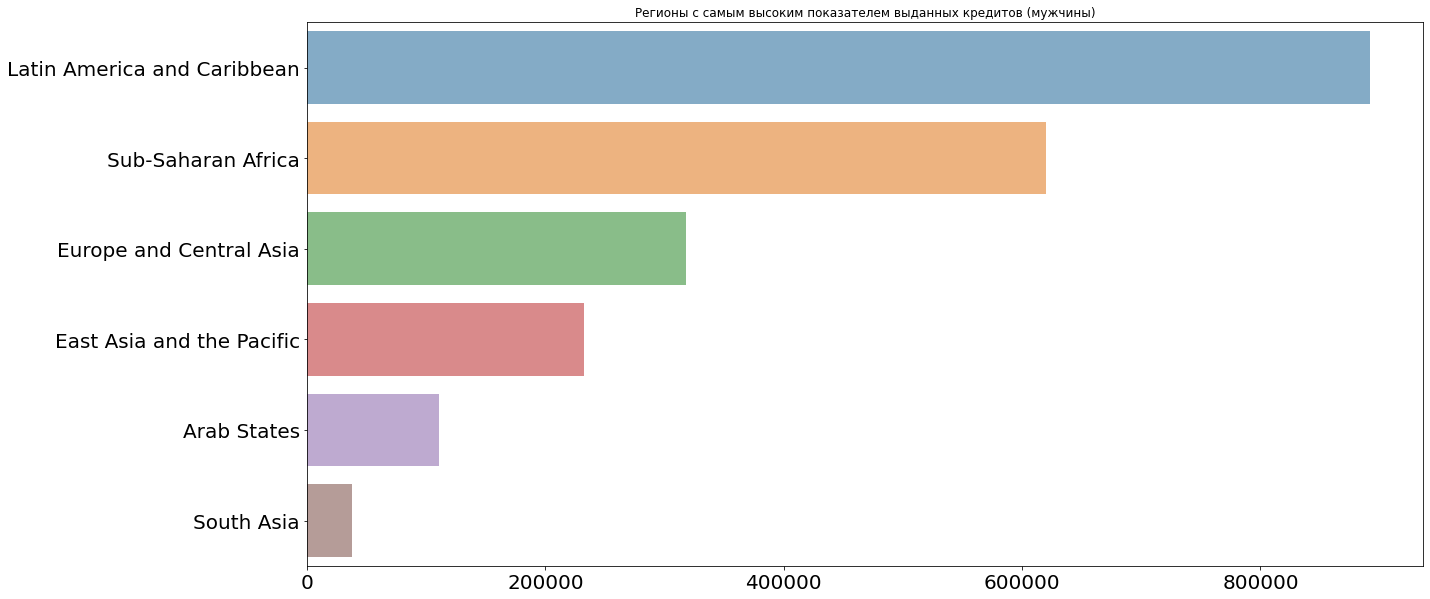

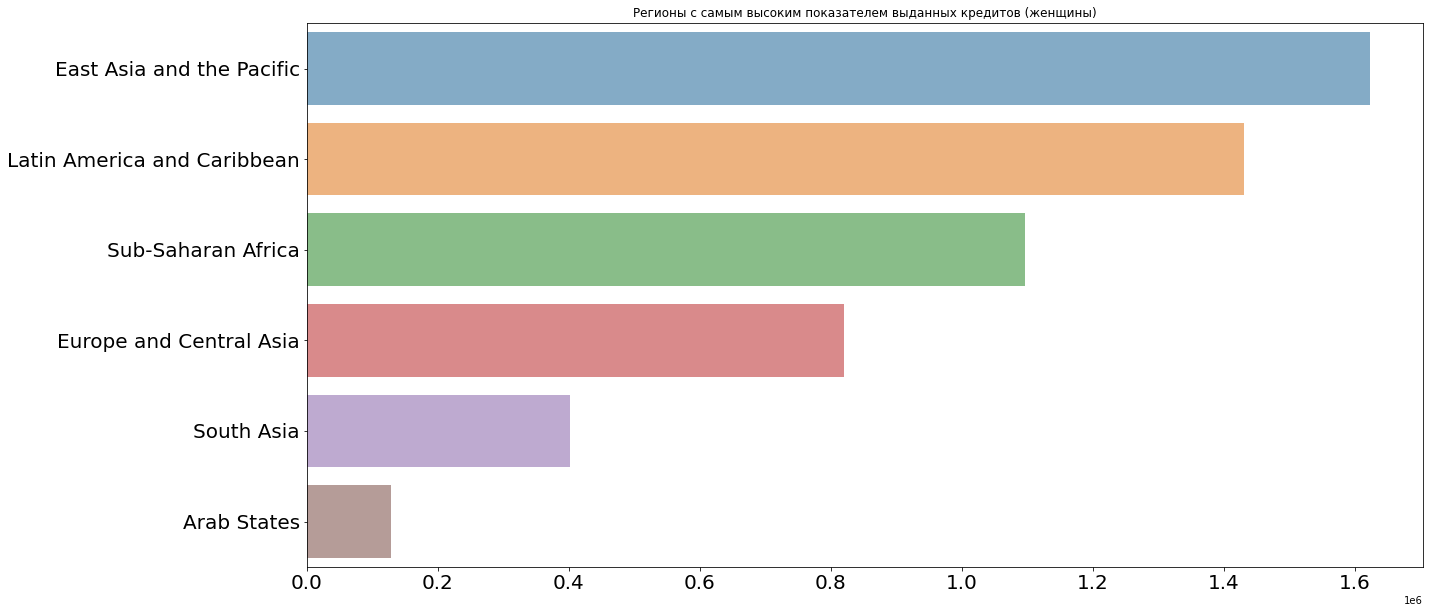

In [40]:
male1_wregion = male1.groupby(['world_region'])['lender_count'].agg(sum = 'sum').sort_values(by = 'sum', ascending = False)
female1_wregion = female1.groupby(['world_region'])['lender_count'].agg(sum = 'sum').sort_values(by = 'sum', ascending = False)

male1_wregion = male1_wregion.reset_index()
female1_wregion =  female1_wregion.reset_index()



plt.figure(figsize = (20, 10))
sns.barplot(y = male1_wregion['world_region'], x = male1_wregion['sum'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Регионы с самым высоким показателем выданных кредитов (мужчины)')

plt.show()
plt.figure(figsize = (20, 10))
sns.barplot(y = female1_wregion['world_region'], x = female1_wregion['sum'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Регионы с самым высоким показателем выданных кредитов (женщины)')
plt.show()


In [41]:
male1_wregion

,world_region,sum
0,Latin America and Caribbean,891722
1,Sub-Saharan Africa,619653
2,Europe and Central Asia,318076
3,East Asia and the Pacific,232086
4,Arab States,111138
5,South Asia,37602


In [42]:
female1_wregion

,world_region,sum
0,East Asia and the Pacific,1623296
1,Latin America and Caribbean,1431715
2,Sub-Saharan Africa,1097194
3,Europe and Central Asia,820337
4,South Asia,402290
5,Arab States,128193


In [ ]:
# В разрезе регионов мы можем видеть лидеров высокое количество выданных кредитов в регионе Latin America and Caribbean	,
# а также Sub-Saharan Africa.
# Регион East Asia and the Pacific присутствует в лидерах только у женщин. 
# Также мы можем увидеть, что наименьшее количество выданных кредитов у обоих полов присутствует в регионах Arab States и 
# South Asia. Вероятнее всего это связано с более высоким уровнем жизни в странах данных регионов. 
# По Latin America and Caribbean	, Sub-Saharan Africa высокое количество выданных кредитов наблюдается у обоих полов. 
# Как мы уже видели в распределении по странам, это свойственно более бедным странам. Количество выданных кредитов у женщин в них
# выше по уже вышеописанным причинам.

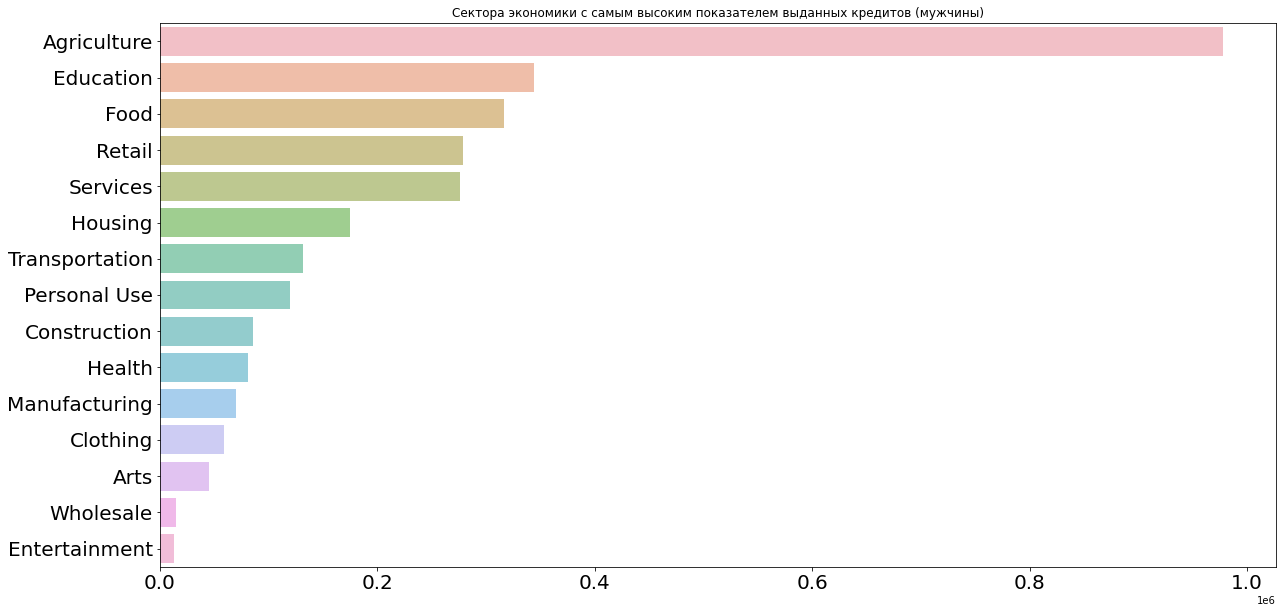

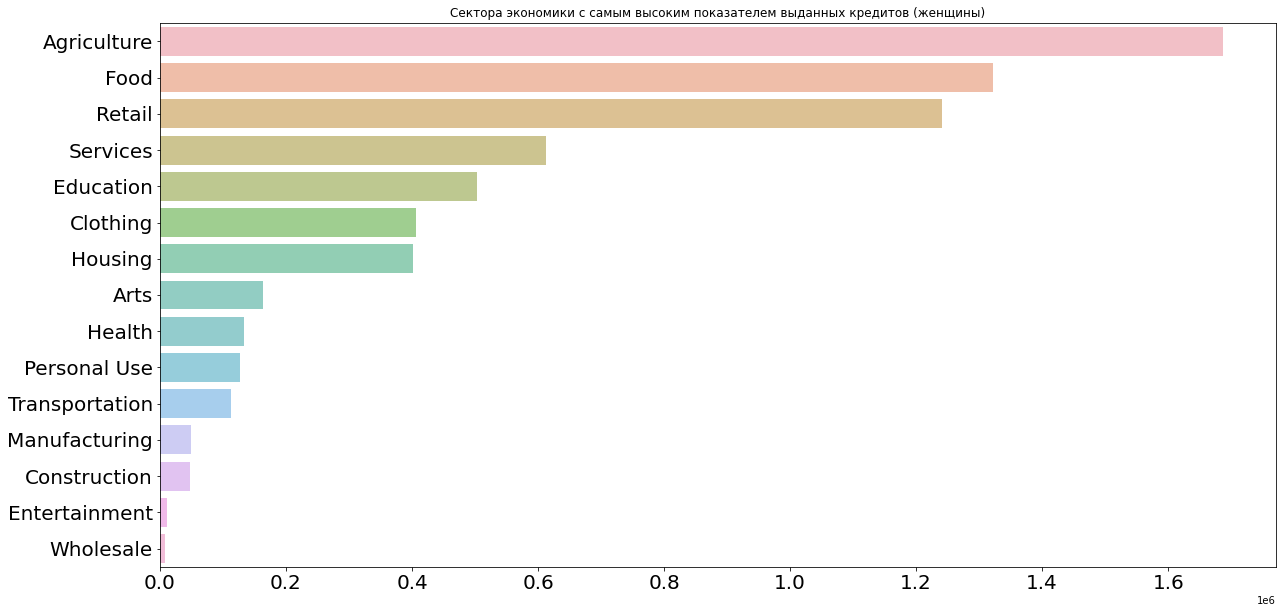

In [45]:
male1_sector = male1.groupby(['sector'])['lender_count'].agg(sum = 'sum').sort_values(by = 'sum', ascending = False)
female1_sector = female1.groupby(['sector'])['lender_count'].agg(sum = 'sum').sort_values(by = 'sum', ascending = False)

male1_sector = male1_sector.reset_index()
female1_sector =  female1_sector.reset_index()



plt.figure(figsize = (20, 10))
sns.barplot(y = male1_sector['sector'], x = male1_sector['sum'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Сектора экономики с самым высоким показателем выданных кредитов (мужчины)')

plt.show()
plt.figure(figsize = (20, 10))
sns.barplot(y = female1_sector['sector'], x = female1_sector['sum'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Сектора экономики с самым высоким показателем выданных кредитов (женщины)')
plt.show()

In [47]:
male1_sector.head(5)


,sector,sum
0,Agriculture,977810
1,Education,343725
2,Food,316597
3,Retail,278661
4,Services,276312


In [48]:
female1_sector.head(5)

,sector,sum
0,Agriculture,1686675
1,Food,1322254
2,Retail,1241099
3,Services,613383
4,Education,503480


In [ ]:
# На графиках и в таблице мы видим, что наиболее популярные сектора для выдачи кредитов полностью совпдают, как у 
# женщин, так и у мужчин. У женщин образование идёт на 5-ом месте и это может быть связано с тем, что регионально в тех 
# регионах и странах, где идёт более высокая выдача кредитов присутствует крайне невыгодные условия для получения образования
# женщинам или даже отсутствие нормальных образовательных учреждений. Между тем Education входит в топ-5 и это может говорить
# о том, что в независимости от региона, как и у женщин, так и у мужчин возникает острая необходимость получать образование
# и стараться улучшить свои финансовые возможности или иметь возможность переехать в другую страну ( где присутсвует 
# востребованность в более квал специалистах)

# Сельское хозяйство имеет наивысшее количество выданных кредитов, как у женщин, так и у мужчин. Это связано с тем, что 
# максимально высокое количество кредитов приходится на страны с невысоким уровнем дохода населения, где с.х. является 
# наиболее востребованным сектором позволяющим людям иметь возможность вести торговлю и иметь источник пропитания. К аналогичным
# выводам можно прийти наблюдаяя в лидерах сектора Food и Retail. 




In [51]:
# Для оценки влияния количества кредитов на суммы кредита отберём соответствующие столбцы


lender_count_loan_amount = df_kiva_loans[['lender_count', 'loan_amount']]
lender_count_loan_amount = lender_count_loan_amount[lender_count_loan_amount['lender_count'] > 0]

In [54]:
lender_count_loan_amount.sort_values(by = 'lender_count', ascending = False).head(5)

,lender_count,loan_amount
70499,2986,100000.0
509048,1765,50000.0
631904,1706,50000.0
565733,1689,50000.0
614922,1688,50000.0


In [55]:
# создадим новый столбец показывающий размер кредита на одного человека

lender_count_loan_amount['per_person'] = lender_count_loan_amount['loan_amount']/lender_count_loan_amount['lender_count']

In [58]:
# сделаем сортировку и посмотрим первые 20 значений с максимальным количеством выдачи кредитов и посмотрим при этом сумму
# на одного человека

lender_count_loan_amount.sort_values(by = 'lender_count', ascending = False).head(20)

,lender_count,loan_amount,per_person
70499,2986,100000.0,33.489618
509048,1765,50000.0,28.328612
631904,1706,50000.0,29.308324
565733,1689,50000.0,29.603316
614922,1688,50000.0,29.620853
583307,1671,50000.0,29.922202
408295,1626,50000.0,30.750308
544548,1609,50000.0,31.075202
496715,1606,50000.0,31.133250
197210,1605,49950.0,31.121495


In [59]:
# посмотрим последние 20 значений для того, чтобы посмотреть суммы, которые выдавались на одного человека. 
lender_count_loan_amount.sort_values(by = 'lender_count', ascending = False).tail(20)

,lender_count,loan_amount,per_person
554233,1,325.0,325.0
554238,1,325.0,325.0
123444,1,175.0,175.0
554261,1,100.0,100.0
123434,1,875.0,875.0
554270,1,425.0,425.0
554273,1,175.0,175.0
554289,1,275.0,275.0
554299,1,100.0,100.0
123351,1,650.0,650.0


In [62]:
# посмотрим на медиану и среднее значение
lender_count_loan_amount['per_person'].agg(['mean', 'median'])

mean      68.322907
median    32.291667
Name: per_person, dtype: float64

In [63]:
# в большинстве случаев мы видим, что в большом кредите участвуют сразу высокое количество кредиторов. Это логично и явно 
# показывает с возможностью минимизации риска на одного кредитора при крупной займе 

In [69]:
# рассмотрим влияние количества кредитов на срок кредитов. 

lender_count_term = df_kiva_loans[['lender_count', 'term_in_months']]


lender_count_term  = lender_count_term[lender_count_term['lender_count'] > 0]

In [70]:
# сделаем сортировку по количеству

lender_count_term.sort_values(by = 'lender_count', ascending = False).head(20)

,lender_count,term_in_months
70499,2986,75.0
509048,1765,14.0
631904,1706,10.0
565733,1689,14.0
614922,1688,14.0
583307,1671,20.0
408295,1626,97.0
544548,1609,8.0
496715,1606,22.0
197210,1605,26.0


In [104]:
# сделаем сортировку по сроку кредита


lender_count_term.sort_values(by = 'lender_count', ascending = False).head(50)

,lender_count,term_in_months
70499,2986,75.0
509048,1765,14.0
631904,1706,10.0
565733,1689,14.0
614922,1688,14.0
583307,1671,20.0
408295,1626,97.0
544548,1609,8.0
496715,1606,22.0
197210,1605,26.0


In [103]:
lender_count_term.sort_values(by = 'lender_count', ascending = False).tail(40)

,lender_count,term_in_months
554556,1,8.0
122987,1,3.0
554563,1,8.0
122980,1,2.0
122965,1,5.0
122960,1,6.0
554593,1,7.0
122946,1,5.0
554614,1,8.0
554615,1,7.0


In [74]:
# мы можем наблюдать, что большая часть кредиторов участвует в даче кредита на срок в пределах одного года или немного 
# выше. Встречаются кредиторы на более высокий срок в верхних отобранных значениях (сортировка по большому количеству
# кредиторов). При низком количестве кредиторов срок кредита постепенно снижается до срока меньше года. 
# Тем не менее мы можем наблюдать далеко не единичные случае исключения, которые могут говорить о том, что вопрос выдачи
# кредита рассматривается кредитором индивидуально в зависимости от целей кредита и других важных параметров. 

In [135]:
# формируем данные с необходимыми показателями
df_mpi_grouped = df_mpi.groupby(['country', 'world_region'])['MPI'].mean().fillna(0).reset_index()

In [136]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how = 'left', on = 'country')

In [49]:
# отбираем необходимые столбцы

df_kiva_loans_fMPI_credit = df_kiva_loans[['MPI', 'loan_amount']]
df_kiva_loans_fMPI_credit = df_kiva_loans_fMPI_credit.dropna()

In [50]:
# сортируем значения по сумме выданного кредита и смотрим на первые 20

df_kiva_loans_fMPI_credit.sort_values(by = 'loan_amount', ascending = False).head(20)

,MPI,loan_amount
70499,0.293800,100000.0
492809,0.183500,50000.0
614869,0.209375,50000.0
526100,0.312200,50000.0
223120,0.000000,50000.0
447374,0.375300,50000.0
163727,0.209375,50000.0
604502,0.320333,50000.0
621860,0.209375,50000.0
496715,0.390182,50000.0


In [51]:
# сортируем значения по MPI и смотрим на первые 20

df_kiva_loans_fMPI_credit.sort_values(by = 'MPI', ascending = False).head(20)

,MPI,loan_amount
200422,0.549778,325.0
229293,0.549778,950.0
211142,0.549778,125.0
229855,0.549778,325.0
127359,0.549778,375.0
233675,0.549778,1100.0
163993,0.549778,175.0
187540,0.549778,325.0
237607,0.549778,175.0
230791,0.549778,200.0


In [ ]:
# По данным мы можем наблюдать, что чем ниже значение MPI, тем выше суммма выданного кредита.Это соотносится ко многим случаям,
# Суммы займа при высоком значении MPI находятся на более низких значениях. При этом мы должны учитывать, что
# данные выводы имеют не строгую закономерность и есть значения, где такая позиция в выборе нарушается. 

In [52]:
df_kiva_loans_tMPI_credit = df_kiva_loans[['MPI', 'term_in_months']]


In [53]:
df_kiva_loans_tMPI_credit = df_kiva_loans_tMPI_credit.dropna()

In [54]:
df_kiva_loans_tMPI_credit.sort_values(by = 'term_in_months', ascending = False).head(20)

,MPI,term_in_months
215863,0.0416,158.0
281445,0.0416,156.0
280535,0.0416,154.0
33155,0.0416,148.0
48069,0.0416,147.0
548199,0.0416,146.0
232096,0.0416,145.0
235564,0.0416,145.0
197995,0.0416,145.0
406588,0.0416,145.0


In [154]:
# Мы абсолютно точно можем видеть, что при высоком сроке на который был выдан кредит, значение MPI имеет достаточно 
# низкое значение, которое присуще более развитым экономически странам. Здесь есть правильная логика, которая заключается
# в отсутствии желания рисковать кредитора в выдаче кредита на долгий срок заёмщику из более бедной страны. 
# Также нужно учитывать, то что в странах с более низким MPI срок кредита является не самым минимальным. Вероятнее всего 
# это связано с тем, чтобы "разнести" невысокий кредит на несколько месяцев, чтобы увеличить возможность выплаты и 
# снизить варианты просрочки с последующим риском неуплаты. Таким образом сделав данный срок более оптимальным. 

In [55]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,South Asia,0.000000


In [56]:
# Рассмотрим зависимость параметров сумма займа, срок, платеж в месяц в зависимости от макро региона

df_kiva_reg_time_sum_months = df_kiva_loans[['world_region', 'loan_amount', 'term_in_months']]

In [57]:
df_kiva_reg_time_sum_months['pay_mon'] = df_kiva_reg_time_sum_months['loan_amount'] / df_kiva_reg_time_sum_months['term_in_months']

<ipython-input-57-c4cc7b776277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kiva_reg_time_sum_months['pay_mon'] = df_kiva_reg_time_sum_months['loan_amount'] / df_kiva_reg_time_sum_months['term_in_months']


In [58]:
df_kiva_reg_time_sum_months.head(5)

,world_region,loan_amount,term_in_months,pay_mon
0,South Asia,300.0,12.0,25.000000
1,South Asia,575.0,11.0,52.272727
2,South Asia,150.0,43.0,3.488372
3,South Asia,200.0,11.0,18.181818
4,South Asia,400.0,14.0,28.571429


In [62]:
# посмотрим на статистические показатели параметров

df_res = df_kiva_reg_time_sum_months.groupby('world_region')\
[['loan_amount', 'term_in_months', 'pay_mon']].agg(['median', 'max', 'min']).fillna(0).reset_index()

In [63]:
df_res

world_region loan_amount                 term_in_months  \
                                    median       max   min         median   
0                  Arab States       900.0   20000.0  50.0           15.0   
1    East Asia and the Pacific       300.0   50000.0  25.0            8.0   
2      Europe and Central Asia       925.0   50000.0  25.0           14.0   
3  Latin America and Caribbean       700.0  100000.0  25.0           14.0   
4                   South Asia       400.0   50000.0  25.0           14.0   
5           Sub-Saharan Africa       400.0   50000.0  25.0           11.0   

                 pay_mon                          
     max  min     median           max       min  
0   41.0  5.0  54.761905   1000.000000  5.357143  
1  120.0  2.0  31.250000   3571.428571  0.337838  
2   98.0  3.0  50.000000    833.750000  0.961538  
3  158.0  2.0  46.153846   5000.000000  2.272727  
4   99.0  3.0  28.571429   3571.428571  0.581395  
5  141.0  1.0  36.538462  10000.000000  1.250000

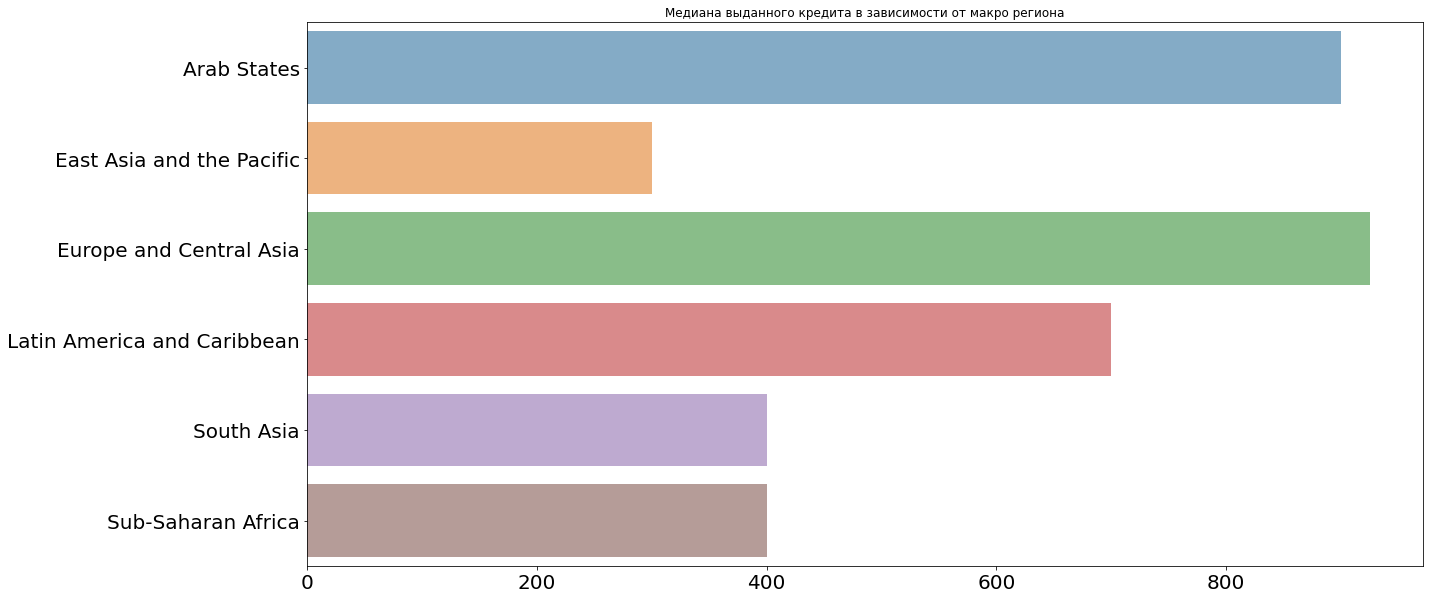

In [73]:
wregion_median = pd.DataFrame({'w_reg':df_res['world_region'], 'median':df_res['loan_amount']['median']})


plt.show()
plt.figure(figsize = (20, 10))
sns.barplot(y = wregion_median['w_reg'], x = wregion_median['median'], alpha = 0.6)
plt.tick_params(labelsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.title('Медиана выданного кредита в зависимости от макро региона')
plt.show()



In [171]:
# Мы явно можем видем, что Arab States и Europe and Central Asia имеют более высокое медианное значение сумммы займа. 
# Это связано с более высоким уровнем благополучия и возможностей выплаты в этих регионах. 
# Аналогично в данных регионах мы можем наблюдать более высокое медианное значение выплаты в месяц. Это также 
# может говорить о более высоких возможностях заёмщиков и их благополучия. 

# Аналогично по минимальному значению кредита мы можем говорить о более высоких значения региона Arab States. 

# Между тем мы должны видеть, что данные не имеют слишком выраженной динамики ( пропорции) от региона к региону. 
# По длительности кредита мы можем явно выделить East Asia and the Pacific, Latin America and Carribean, Sub-Saharan Africa.
# При этом мы можем увидеть, что очень длительные периоды кредиты связаны в с развитием и получением образования. При этом
# во всем этих случаях это касается Кении и Доминиканской Республики. 




In [60]:
df_kiva_loans[df_kiva_loans['term_in_months'] >= 120]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region,MPI
1584,654769,5025.0,5025.0,Higher education costs,Education,to pay for the costs of his studies in medicine.,DO,Dominican Republic,Santiago,DOP,...,2014-01-07 08:00:00+00:00,2014-01-09 22:27:51+00:00,137.0,149,"#Schooling, #Inspiring Story, #Orphan, #Low-pr...",male,irregular,2014-01-07,Latin America and Caribbean,0.041600
9956,663005,4825.0,4825.0,Higher education costs,Education,to pay matriculation fees for his studies in s...,DO,Dominican Republic,Santo Domingo,DOP,...,2014-02-28 08:00:00+00:00,2014-02-17 21:23:17+00:00,124.0,172,"#Low-profit FP, #Post-disbursed, #Schooling, u...",male,irregular,2014-01-28,Latin America and Caribbean,0.041600
22944,675757,8175.0,8175.0,Higher education costs,Education,pay for higher education costs.,DO,Dominican Republic,La Altagracia,DOP,...,2014-03-11 07:00:00+00:00,2014-03-10 12:30:39+00:00,143.0,265,"volunteer_like, user_favorite, #Low-profit FP,...",female,irregular,2014-02-24,Latin America and Caribbean,0.041600
27674,680764,7625.0,7625.0,Higher education costs,Education,to pay for higher education costs.,DO,Dominican Republic,Santo Domingo,DOP,...,2014-04-08 07:00:00+00:00,2014-03-16 01:59:22+00:00,130.0,293,"user_favorite, #Post-disbursed, user_favorite,...",female,irregular,2014-03-07,Latin America and Caribbean,0.041600
27810,680815,9325.0,9325.0,Higher education costs,Education,to pay for her university expenses,DO,Dominican Republic,La Romana,DOP,...,2014-04-08 07:00:00+00:00,2014-03-16 20:08:15+00:00,134.0,343,"#Schooling, #First Loan, #Single, user_favorit...",female,irregular,2014-03-07,Latin America and Caribbean,0.041600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633296,1295350,16975.0,16975.0,Higher education costs,Education,to pay for tuition fees at Strathmore University.,KE,Kenya,Nairobi,KES,...,2017-06-26 07:00:00+00:00,2017-05-20 19:36:54+00:00,122.0,563,"#Schooling, user_favorite, user_favorite, user...",female,irregular,2017-05-10,Sub-Saharan Africa,0.209375
633393,1295765,17475.0,17475.0,Higher education costs,Education,to pay for tuition fees at Strathmore University.,KE,Kenya,Nairobi,KES,...,2017-06-26 07:00:00+00:00,2017-05-21 10:30:14+00:00,122.0,604,"volunteer_like, #Schooling, user_favorite, use...",female,irregular,2017-05-10,Sub-Saharan Africa,0.209375
636577,1298725,8450.0,8450.0,Higher education costs,Education,to cover higher education costs.,DO,Dominican Republic,San Cristobal,DOP,...,2017-06-13 07:00:00+00:00,2017-05-15 22:38:28+00:00,125.0,157,"volunteer_like, #Schooling, user_favorite, use...",female,irregular,2017-05-15,Latin America and Caribbean,0.041600
653559,1316503,6350.0,6350.0,Higher education costs,Education,to cover her college expenses,DO,Dominican Republic,La Vega,DOP,...,2017-07-08 07:00:00+00:00,2017-06-13 17:24:58+00:00,143.0,125,"user_favorite, #Schooling, user_favorite, #Fem...",female,irregular,2017-06-08,Latin America and Caribbean,0.041600
